# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="../../images/icon102.png" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 03: Training Data & Feature views</span>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/logicalclocks/hopsworks-tutorials/blob/master/advanced_tutorials/{project_name}/{notebook_name}.ipynb)

<span style="font-width:bold; font-size: 1.4rem;">This notebook explains how to read from a feature group, create training dataset within the feature store, train a model and save it to model registry.</span>

## 🗒️ This notebook is divided into the following sections:

1. Fetch Feature Groups.
2. Define Transformation functions.
3. Create Feature Views.
4. Create Training Dataset with training, validation and test splits.
5. Train the model.
6. Register model in Hopsworks model registry.
7. Load batch data.
8. Predict using model from Model Registry.

![part2](../../images/02_training-dataset.png) 

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## <span style="color:#ff5f27;"> 🔮 Connecting to Hopsworks Feature Store </span>

In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store() 

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://5c1f4710-7cb2-11ed-aab3-0135b8658ce3.cloud.hopsworks.ai/p/123
Connected. Call `.close()` to terminate connection gracefully.


## <span style="color:#ff5f27;">🪄 Retrieving Feature Groups</span>

In [3]:
application_train_fg = fs.get_or_create_feature_group(
    name = 'application_train',
    version = 1
)

bureau_balance_fg = fs.get_or_create_feature_group(
    name = 'bureau_balance',
    version = 1
)

bureau_fg = fs.get_or_create_feature_group(
    name = 'bureau',
    version = 1
)

previous_application_fg = fs.get_or_create_feature_group(
    name = 'previous_application',
    version = 1
)

pos_cash_balance_fg = fs.get_or_create_feature_group(
    name = 'pos_cash_balance',
    version = 1
)

installments_payments_fg = fs.get_or_create_feature_group(
    name = 'installments_payments',
    version = 1
)

credit_card_balance_fg = fs.get_or_create_feature_group(
    name = 'credit_card_balance',
    version = 1
)

previous_loan_counts_fg = fs.get_or_create_feature_group(
    name = 'previous_loan_counts',
    version = 1
)

---

## <span style="color:#ff5f27;">🕵🏻‍♂️ Feature Groups Investigation</span>

We can use `FeatureGroup.show()` method to select top n rows. 

Also we use method `FeatureGroup.read()` in order **to aggregate queries**, which are the output of next methods:

- `FeatureGroup.get_feture()` to get specific feature from our Feature Group.

- `FeatureGroup.select()` to get a few features from our Feature Group.

- `FeatureGroup.select_all()` to get all features from our Feature Group.

- `FeatureGroup.select_except()` to get all features except a few from our Feature Group.

- `FeatureGroup.filter()` in order to apply specific filter to the feature group.

In [4]:
application_train_fg

In [5]:
application_train_fg.select_all()

In [6]:
application_train_fg.read().head()

2022-12-19 16:46:41,718 INFO: USE `credit_scores_featurestore`
2022-12-19 16:46:41,902 INFO: SELECT `fg0`.`sk_id_curr` `sk_id_curr`, `fg0`.`target` `target`, `fg0`.`name_contract_type` `name_contract_type`, `fg0`.`code_gender` `code_gender`, `fg0`.`flag_own_car` `flag_own_car`, `fg0`.`flag_own_realty` `flag_own_realty`, `fg0`.`cnt_children` `cnt_children`, `fg0`.`amt_income_total` `amt_income_total`, `fg0`.`amt_credit` `amt_credit`, `fg0`.`amt_annuity` `amt_annuity`, `fg0`.`amt_goods_price` `amt_goods_price`, `fg0`.`name_type_suite` `name_type_suite`, `fg0`.`name_income_type` `name_income_type`, `fg0`.`name_education_type` `name_education_type`, `fg0`.`name_family_status` `name_family_status`, `fg0`.`name_housing_type` `name_housing_type`, `fg0`.`region_population_relative` `region_population_relative`, `fg0`.`days_birth` `days_birth`, `fg0`.`days_employed` `days_employed`, `fg0`.`days_registration` `days_registration`, `fg0`.`days_id_publish` `days_id_publish`, `fg0`.`flag_mobil` `fla

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,201573,0,Cash loans,M,Y,N,2,157500.0,447768.0,48352.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0
1,168624,0,Cash loans,F,N,Y,1,72000.0,297130.5,15556.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,377844,1,Cash loans,M,N,Y,0,157500.0,393543.0,21478.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,300127,0,Cash loans,F,N,Y,0,90000.0,193572.0,13063.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,444083,0,Cash loans,F,N,Y,0,112500.0,227520.0,18103.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


---

## <span style="color:#ff5f27;"> 💼 Query Preparation</span>

In [7]:
fg_query = bureau_fg.select_except(['sk_id_curr','sk_id_bureau'])\
                    .join(application_train_fg.select_except(['sk_id_curr','flag_mobil',*[f'flag_document_{num}' for num in [2,4,7,10,12,14,17,19,20,21]],'amt_credit', 'weekday_appr_process_start', 'hour_appr_process_start']))\
                    .join(bureau_balance_fg.select_except(['sk_id_bureau','months_balance']))\
                    .join(previous_application_fg.select_except(['sk_id_prev','sk_id_curr','name_contract_type','name_contract_status']))\
                    .join(pos_cash_balance_fg.select_except(['sk_id_prev','sk_id_curr','months_balance', 'name_contract_status', 'sk_dpd', 'sk_dpd_def']))\
                    .join(installments_payments_fg.select_except(['sk_id_prev','sk_id_curr']))\
                    .join(credit_card_balance_fg.select_except(['sk_id_prev','sk_id_curr']))\
                    .join(previous_loan_counts_fg.select_except('sk_id_curr'))

fg_query_show5 = fg_query.show(5)
fg_query_show5

2022-12-19 16:46:49,628 INFO: USE `credit_scores_featurestore`
2022-12-19 16:46:49,813 INFO: SELECT `fg7`.`credit_active` `credit_active`, `fg7`.`credit_currency` `credit_currency`, `fg7`.`days_credit` `days_credit`, `fg7`.`credit_day_overdue` `credit_day_overdue`, `fg7`.`days_credit_enddate` `days_credit_enddate`, `fg7`.`cnt_credit_prolong` `cnt_credit_prolong`, `fg7`.`amt_credit_sum` `amt_credit_sum`, `fg7`.`amt_credit_sum_debt` `amt_credit_sum_debt`, `fg7`.`amt_credit_sum_overdue` `amt_credit_sum_overdue`, `fg7`.`credit_type` `credit_type`, `fg7`.`days_credit_update` `days_credit_update`, `fg0`.`target` `target`, `fg0`.`name_contract_type` `name_contract_type`, `fg0`.`code_gender` `code_gender`, `fg0`.`flag_own_car` `flag_own_car`, `fg0`.`flag_own_realty` `flag_own_realty`, `fg0`.`cnt_children` `cnt_children`, `fg0`.`amt_income_total` `amt_income_total`, `fg0`.`amt_annuity` `amt_annuity`, `fg0`.`amt_goods_price` `amt_goods_price`, `fg0`.`name_type_suite` `name_type_suite`, `fg0`.`na

,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_overdue,credit_type,...,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def,sk_id_curr,previous_loan_counts
0,Closed,currency 1,-904,0,435.0,0,175500.0,0.0,0.0,Consumer credit,...,0.0,0,0.0,0.0,36.0,Active,0,0,356203,2
1,Closed,currency 1,-904,0,435.0,0,175500.0,0.0,0.0,Consumer credit,...,0.0,0,0.0,0.0,36.0,Active,0,0,356203,2
2,Closed,currency 1,-904,0,435.0,0,175500.0,0.0,0.0,Consumer credit,...,0.0,0,0.0,0.0,36.0,Active,0,0,356203,2
3,Closed,currency 1,-904,0,435.0,0,175500.0,0.0,0.0,Consumer credit,...,0.0,0,0.0,0.0,36.0,Active,0,0,356203,2
4,Closed,currency 1,-904,0,435.0,0,175500.0,0.0,0.0,Consumer credit,...,0.0,0,0.0,0.0,36.0,Active,0,0,356203,2


---

## <span style="color:#ff5f27;">🤖 Transformation functions</span>

Hopsworks Feature Store provides functionality to attach transformation functions to training datasets.

Hopsworks Feature Store also comes with built-in transformation functions such as `min_max_scaler`, `standard_scaler`, `robust_scaler` and `label_encoder`.

In [8]:
[t_func.name for t_func in fs.get_transformation_functions()]

['robust_scaler', 'standard_scaler', 'min_max_scaler', 'label_encoder']

We can retrieve transformation function we need .

To attach transformation function to training dataset provide transformation functions as dict, where key is feature name and value is online transformation function name.

Also training dataset must be created from the Query object. Once attached transformation function will be applied on whenever save, insert and get_serving_vector methods are called on training dataset object.

In [9]:
cat_cols = fg_query_show5.dtypes[fg_query_show5.dtypes == 'object'].index
num_cols = fg_query_show5.dtypes[fg_query_show5.dtypes != 'object'].index

mapping_transformer = {col:fs.get_transformation_function(name='label_encoder') for col in cat_cols}
mapping_transformer.update({col:fs.get_transformation_function(name='standard_scaler') for col in num_cols if col !='target'})

---

## <span style="color:#ff5f27;"> ⚙️ Feature View Creation </span>

`Feature Views` stands between **Feature Groups** and **Training Dataset**. Сombining **Feature Groups** we can create **Feature Views** which store a metadata of our data. Having **Feature Views** we can create **Training Dataset**.

The Feature Views allows schema in form of a query with filters, define a model target feature/label and additional transformation functions.

In order to create Feature View we can use `FeatureStore.get_or_create_feature_view()` method.

We can specify next parameters:

- `name` - name of a feature group.

- `version` - version of a feature group.

- `labels`- out target variable.

- `transformation_functions` - functions to transform our features.

- `query` - query object with data.

In [10]:
feature_view = fs.get_or_create_feature_view(
    name = 'credit_scores',
    version = 1,
    labels = ['target'],
    transformation_functions = mapping_transformer,
    query = fg_query
)

Feature view created successfully, explore it at 
https://5c1f4710-7cb2-11ed-aab3-0135b8658ce3.cloud.hopsworks.ai/p/123/fs/71/fv/credit_scores/version/1


---

## <span style="color:#ff5f27;"> 🏋️ Training Dataset Creation</span>

In Hopsworks training data is a query where the projection (set of features) is determined by the parent **FeatureView** with an optional snapshot on disk of the data returned by the query.

**Training Dataset  may contain splits such as:** 
* Training set - the subset of training data used to train a model.
* Validation set - the subset of training data used to evaluate hparams when training a model
* Test set - the holdout subset of training data used to evaluate a mode

Here are some importand things:

- It will inherit the name of FeatureView.

- The feature store currently supports the following data formats for
training datasets: **tfrecord, csv, tsv, parquet, avro, orc**.

- We can choose necessary format using **data_format** parameter.

- **start_time** and **end_time** in order to filter dataset in specific time range.

In [11]:
td_version, td_job = feature_view.create_train_test_split(
    test_size = 0.2
)

Training dataset job started successfully, you can follow the progress at 
https://5c1f4710-7cb2-11ed-aab3-0135b8658ce3.cloud.hopsworks.ai/p/123/jobs/named/credit_scores_1_create_fv_td_19122022164931/executions


---
## <span style="color:#ff5f27;"> ✨ Load Training Data </span>

First, we'll need to fetch the training dataset.

You can use **Feature View** in order to retrieve **training dataset** using `FeatureView.get_train_test_split()` method.

In [12]:
X_train, X_test, y_train, y_test = feature_view.get_train_test_split(
    training_dataset_version = td_version
)

---
## <span style="color:#ff5f27;"> 🧬 Modeling</span>

In [14]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---
## <span style="color:#ff5f27;"> 👨🏻‍⚖️ Model Evaluation</span>

### <span style="color:#ff5f27;"> 📝 Imports</span>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
from sklearn.metrics import f1_score

import os

In [24]:
score = f1_score(y_test, model.predict(X_test), average="macro")

print(f'⛳️ F1 score: {score}')

⛳️ F1 score: 1.0


Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


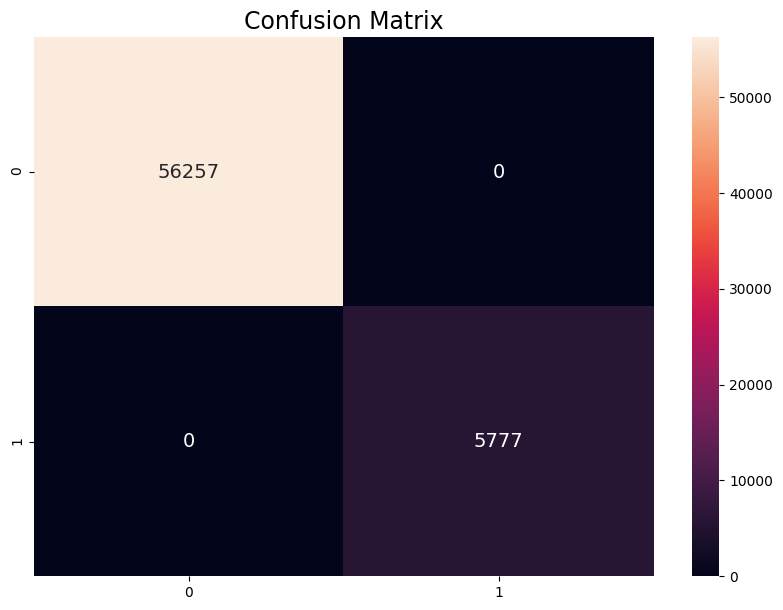

In [17]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test)).astype(int)

figure_cm = plt.figure(figsize = (10,7))
figure_cm = sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 14}, fmt='.10g')

plt.title('Confusion Matrix',fontsize=17)
plt.show()

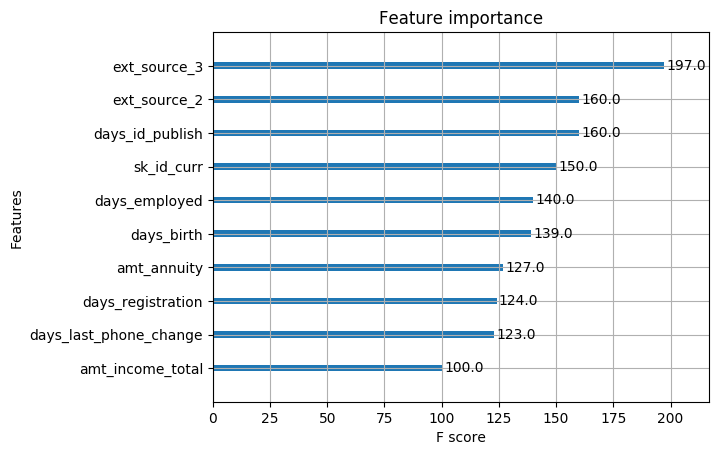

In [18]:
figure_imp = plot_importance(model, max_num_features=10, importance_type='weight')
plt.show()

### <span style="color:#ff5f27;"> 💽 Save plots to model registry</span>

In [27]:
model_dir="assets"

if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)
    
figure_cm.figure.savefig(model_dir + 'confusion_matrix.png')
figure_imp.figure.savefig(model_dir + 'feature_importance.png')

### <span style="color:#ff5f27;"> 📤 Retrieve plots from model registry</span>

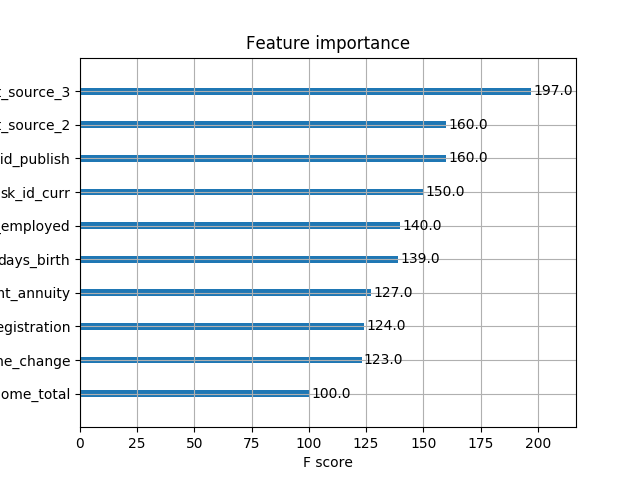

In [29]:
feature_imp = Image.open(model_dir + 'feature_importance.png')

feature_imp.show()

---
## <span style="color:#ff5f27;">🗄 Model Registry</span>

One of the features in Hopsworks is the model registry. This is where you can store different versions of models and compare their performance.

In [ ]:
mr = project.get_model_registry()

### <span style="color:#ff5f27;">⚙️ Model Schema</span>

The model needs to be set up with a [Model Schema](https://docs.hopsworks.ai/machine-learning-api/latest/generated/model_schema/), which describes the inputs and outputs for a model.

A Model Schema can be automatically generated from training examples, as shown below.

In [28]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(X_train.values)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_schema.to_dict()

{'input_schema': {'tensor_schema': {'shape': '(247322, 118)',
   'type': 'float64'}},
 'output_schema': {'columnar_schema': [{'name': 'target', 'type': 'int64'}]}}

### <span style="color:#ff5f27;">💽 Save a model</span>

In [31]:
import joblib

model_dir="credit_scores_model"

if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

model_path = model_dir + 'credit_scores_model.pkl'

joblib.dump(model, model_path)

model = mr.python.create_model(
    name="credit_scores_model",
    metrics={"f1": "0.5"},
    description="XGB for Credit Scores Project",
    input_example=X_train.sample(),
    model_schema=model_schema
)

model.save(model_path)

NameError: name 'mr' is not defined

---
## <span style="color:#ff5f27;"> ✨ Loading Batch Data </span>

In [ ]:
feature_view.init_batch_scoring(
    training_dataset_version=td_version
)

df = feature_view.get_batch_data()
df.head()

## <span style="color:#ff5f27;"> 🗄 Retrieving model from Model Registry </span>

In [ ]:
model = mr.get_model(
    name="credit_scores_model",
    version=1
)
model_dir = model.download()
model = joblib.load(model_dir + "/credit_scores_model.pkl")
model

## <span style="color:#ff5f27;"> 🤖 Making the predictions </span>

In [ ]:
predictions = model.predict(df)
predictions[:10]

---

### <span style="color:#ff5f27;">🥳 <b> Next Steps  </b> </span>
Congratulations you've now completed the churn risk prediction tutorial for Managed Hopsworks.

Check out our other tutorials on ➡ https://github.com/logicalclocks/hopsworks-tutorials

Or documentation at ➡ https://docs.hopsworks.ai

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/logicalclocks/hopsworks-tutorials/blob/master/advanced_tutorials/{project_name}/{notebook_name}.ipynb)